In [12]:
#%%writefile /mnt/solexa/mel_yang/bronzeage/jda/jda_getpd_dfreq_downsample.py
##Make frequency and read file, oriented by ancestry (allele in chimp)

import collections
import numpy as np
import sys
import random
moderneas="Han_HGDP"
#moderneas=[sys.argv[1]]

pD1="/home/mel_yang/projects/bronzeage/"
pD2="/mnt/solexa/mel_yang/bronzeage/jda/"
indfilename="ind_A_v13_TBH"
indfile=open(pD1+indfilename+".ind",'r')
pdeasall=[]
for ind,line in enumerate(indfile):
    x = line.split()
    if x[2] == moderneas: pdeasall.append(ind)
    if x[2] == "Chimp": ancind=ind ##ONLY 0/2, no heterozygotes
indfile.close()
print len(pdeasall)
for howmany in [5,10,15,20,25,30]:
    pdeas=sorted(random.sample(pdeasall,howmany))

    newfile=open(pD2+indfilename+".pdEAS."+moderneas+".ss"+str(howmany)+".dfreq",'w')
    newfile.write(moderneas+".ss"+str(howmany)+'\n')

    genofile=open(pD1+indfilename+".geno",'r')
    num=0
    for line in genofile:
        num+=1
        #if num==10: break
        ancgeno=int(line[ancind])

        easgeno=[int(line[ind]) for ind in pdeas]
        if 9 in easgeno: dfreqs=-5
        total=2.0*(len(easgeno)-easgeno.count(9))
        secondallele=(np.sum(easgeno)-9*easgeno.count(9))
        if ancgeno==0: mydfreq=secondallele/total
        elif ancgeno==2: mydfreq=1-(secondallele/total)
        else: print "ancgeno is", ancgeno
        dfreqs=mydfreq
        #if indiv=="Han_HGDP": print easgeno, ancgeno, mydfreq,mydfreq*66
        newfile.write("%.4f" % dfreqs + '\n')

    newfile.close()

  
    

33


In [14]:
%%bash
pD="/mnt/solexa/mel_yang/bronzeage/jda/"
addon="_switchanc"
ref="Han_HGDP"
for ss in 5 10 15 20 25 30; 
do
    paste ${pD}jda_anceas${addon}.chrompos ${pD}ind_A_v13_TBH.pdEAS.${ref}.ss${ss}.dfreq ${pD}jda_anceas${addon}.readcount | grep -v "-" | grep -v "0.0000" | grep -v "1.0000" > ${pD}jda_anceas${addon}_${ref}.ss${ss}_nomissfixed.comb
done

In [15]:
%%writefile /home/mel_yang/projects/bronzeage/continuity/run_mel_job_all_Han_HGDPss.py
from ancient_genotypes import *
from numpy import *
import pandas
import cPickle
pD="/mnt/solexa/mel_yang/bronzeage/jda/"
addon="_switchanc"
refpop="Han_HGDP"
myss=[5,10,15,20,25,30]
for ss in myss:
    myref=refpop+".ss"+str(ss)
    freq, reads, inds = parse_reads(pD+"jda_anceas"+addon+"_"+myref+"_nomissfixed.comb",cutoff=0)
    ##Tonglin, Linzi, XianShang, Yaojia/ZGM, TY, DHG, BLK
    pops=[[0],[1,6,7],[2,5],[3],[4],[8],[9,10,11,12,13],[14]]
    params_pops = optimize_pop_params_error_parallel(freq,reads,pops,detail=False,num_core=8,continuity=False)
    cPickle.dump(params_pops,open(pD+"ind_A_v13_TBH"+addon+"."+myref+"_contFalse.pickle","w"))
    params_pops = optimize_pop_params_error_parallel(freq,reads,pops,detail=False,num_core=8,continuity=True)
    cPickle.dump(params_pops,open(pD+"ind_A_v13_TBH"+addon+"."+myref+"_contTrue.pickle","w"))

Writing /home/mel_yang/projects/bronzeage/continuity/run_mel_job_all_Han_HGDPss.py


7
_______________________
Han_HGDP.ss5
False ZGM 310550.833196 [0.054420965719565964, 0.034167206751358731, 0.0074111527563728097]
True ZGM 310609.123628 [0.060338355637612091, 0.0071425727548208185]
_______________________
Han_HGDP.ss10
False ZGM 326126.939717 [0.03138709632922794, 0.01586768476439172, 0.0070748317602122553]
True ZGM 326141.470911 [0.033772479039410719, 0.0069606414312805261]
_______________________
Han_HGDP.ss15
False ZGM 329449.630231 [0.02241611645646055, 0.010718166199987307, 0.0069361896639413712]
True ZGM 329456.628981 [0.023883311384686415, 0.0068629989529264005]
_______________________
Han_HGDP.ss20
False ZGM 330987.150369 [0.018076095944988265, 0.0072227766296364907, 0.0068248436174022375]
True ZGM 330990.378168 [0.018987758253830058, 0.0067770867897648471]
_______________________
Han_HGDP.ss25
False ZGM 331870.345883 [0.015403729542535089, 0.0064551602644194669, 0.0067453214755399263]
True ZGM 331872.932457 [0.016167681506623358, 0.006703391291466884]
______

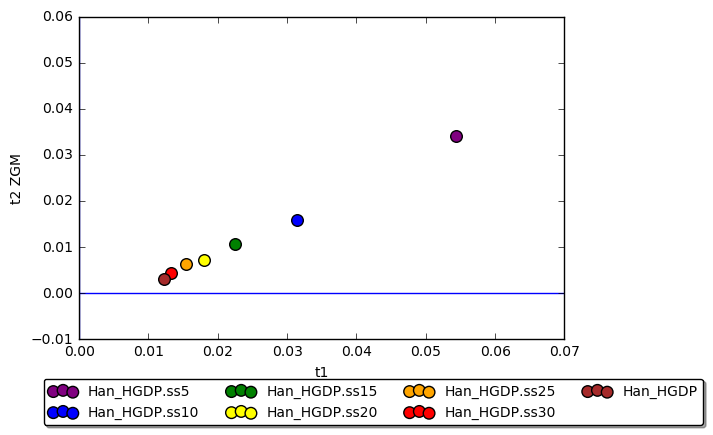

In [12]:
%matplotlib inline

import cPickle
import matplotlib.pyplot as plt
pD="/mnt/solexa/mel_yang/bronzeage/jda/"
addon="_switchanc"
refpops=["Han_HGDP.ss5","Han_HGDP.ss10","Han_HGDP.ss15","Han_HGDP.ss20",
         "Han_HGDP.ss25","Han_HGDP.ss30","Han_HGDP"]
print len(refpops)
#refpops=["Han_HGDP"]
mypops=["Tonglin", "Linzi", "XianShang", "Yaojia","ZGM", "TY","DHG","BLK"]
popiwant="TY"
#fig = plt.figure(figsize=(17,10))
fig = plt.figure()
for myind,popiwant in enumerate(mypops):
    if myind!=4: continue
    #ax = fig.add_subplot(4,2,myind+1)
    ax = fig.add_subplot(1,1,1)
    t1f,t2f,t1t,t2t=[],[],[],[]
    for refpop in refpops:
        print "_______________________"
        print refpop
        falsefile=open(pD+"ind_A_v13_TBH"+addon+"."+refpop+"_contFalse.pickle",'r')
        falsedat=cPickle.load(falsefile)
        truefile=open(pD+"ind_A_v13_TBH"+addon+"."+refpop+"_contTrue.pickle",'r')
        truedat=cPickle.load(truefile)
        #print falsedat

        for ind,mypop in enumerate(falsedat):
            #if ind in [0,2,3,4]: continue
            #if ind in [0,1,2,3]: continue
            if mypops[ind] == popiwant:
                print "False", mypops[ind],mypop[1], list(mypop[0])
                print "True", mypops[ind],truedat[ind][1],list(truedat[ind][0])
                t1f.append(mypop[0][0])
                t2f.append(mypop[0][1])
                t1t.append(truedat[ind][0][0])
                t2t.append(truedat[ind][0][1])


    colors=["purple","blue","green","yellow","orange","red","brown",
            "gray","black","lavender","fuchsia","goldenrod","peachpuff","cyan",
            "lawngreen","mediumslateblue","cadetblue","pink","tan","lavenderblush",
            "sage","peru","gainsboro"]
    #print t1f
    for i in range(len(t1f)):
        #handles.append(ax.scatter(t1f[i],t2f[i],c=colors[i],label=refpops[i]))
        ax.scatter(t1f[i],t2f[i],label=refpops[i],c=colors[i],s=70)
    
    #ax.set_xlim((0,0.13))
    #ax.set_ylim((0,0.35))
    ax.set_xlabel("t1")
    ax.set_ylabel("t2 "+popiwant)
    ax.axhline(y=0)
    ax.axvline(x=0)
ax.legend(fontsize=10,bbox_to_anchor=(1.3, -0.1),ncol=4, fancybox=True, shadow=True)
fig.tight_layout()

False Tonglin 52061.8955765 [0.054480645052745767, 0.38185557455794927, 0.043362188810175645]
True Tonglin 52190.6140557 [0.065845343819667002, 0.023405184046220062]
False Tonglin 54571.8528344 [0.029837957891939881, 0.23893245494152363, 0.028679767784344033]
True Tonglin 54651.9668268 [0.038895342840168469, 0.018104541912876446]
False Tonglin 55098.7424636 [0.018912350471541453, 0.18014379745536471, 0.022150473194982159]
True Tonglin 55154.3511026 [0.025967964424106739, 0.014969969946831238]
False Tonglin 55341.0784892 [0.015612077192437682, 0.16138953209645604, 0.019822551750864319]
True Tonglin 55389.335477 [0.021966063555080548, 0.013803968587471741]
False Tonglin 55439.9205901 [0.01261787803039309, 0.14114496610103219, 0.017235499106113092]
True Tonglin 55479.4007161 [0.018244389335631526, 0.012200048579208814]
False Tonglin 55407.2483937 [0.0095771867490733985, 0.1271714983130505, 0.015404565340877436]
True Tonglin 55441.24003 [0.014545451929190659, 0.011107179853578517]
False Li

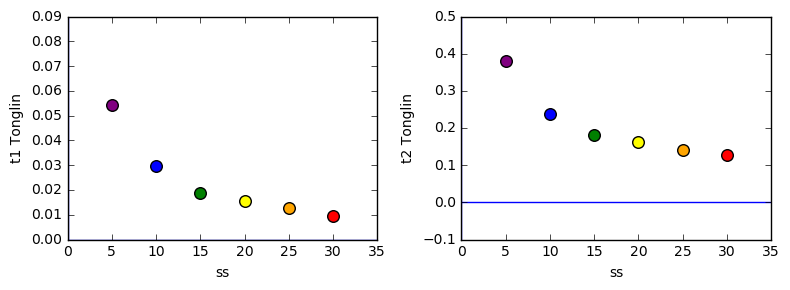

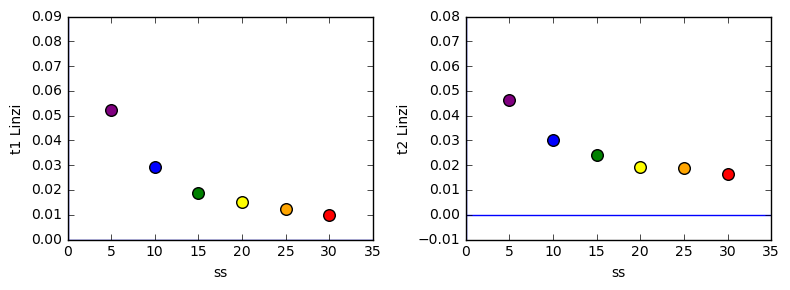

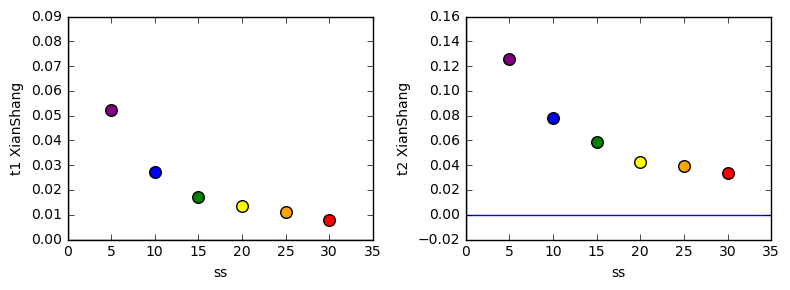

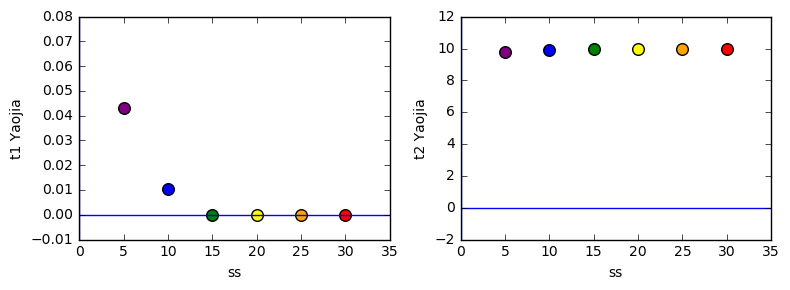

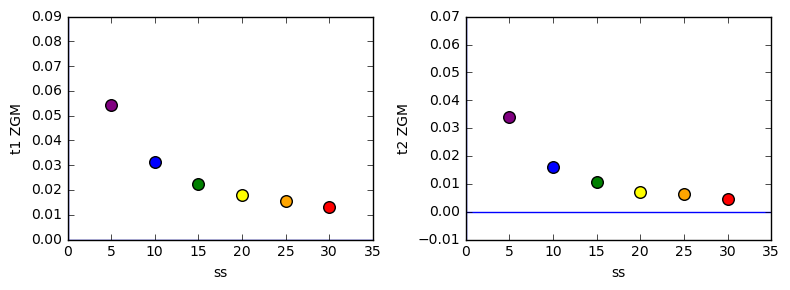

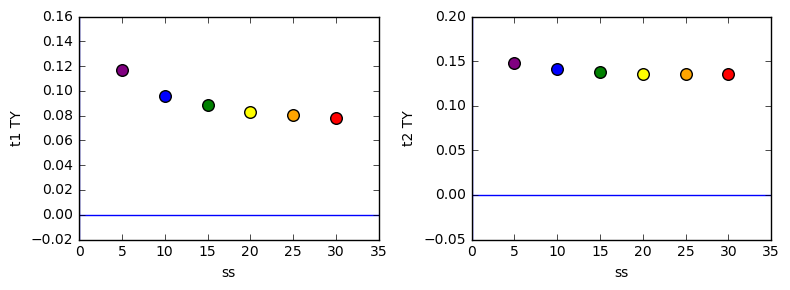

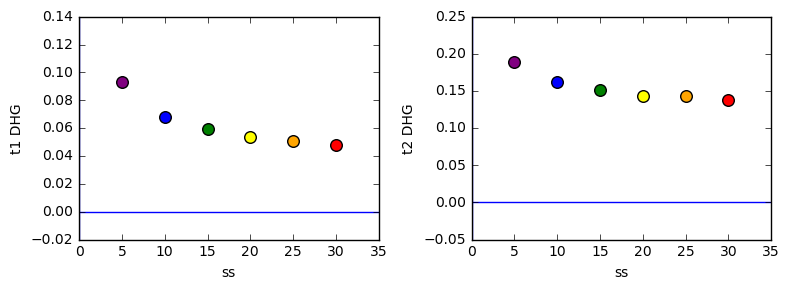

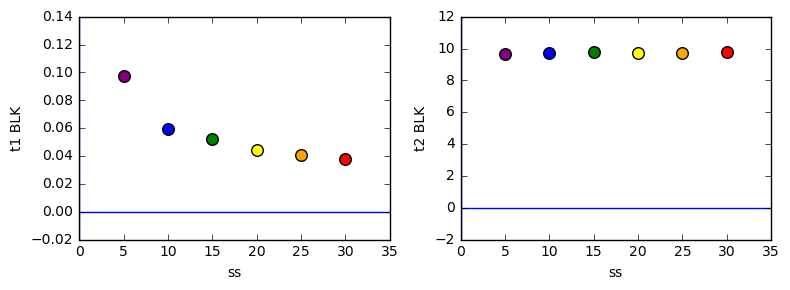

In [5]:
%matplotlib inline

import cPickle
import matplotlib.pyplot as plt
pD="/mnt/solexa/mel_yang/bronzeage/jda/"
addon="_switchanc"
refpops=["Han_HGDP","Japanese","Ulchi","Zhuang","Dong","Qiang_Horpa","Tibetan_Gangcha",
        "Thai","Maonan","Mulam","Tibetan_Chamdo","She","Dai","Yi","Tujia","Miao"]
refpops=["Han_HGDP.ss5","Han_HGDP.ss10","Han_HGDP.ss15","Han_HGDP.ss20",
         "Han_HGDP.ss25","Han_HGDP.ss30"] #,"Han_HGDP"]
myss=[33, 29, 25, 22, 20, 20, 20, 19, 17, 17, 12, 10, 10, 10, 10, 10]
myss=[5,10,15,20,25,30,33]
mypops=["Tonglin", "Linzi", "XianShang", "Yaojia","ZGM", "TY","DHG","BLK"]
popiwant="TY"

#fig = plt.figure()
for myind,popiwant in enumerate(mypops):
    fig = plt.figure(figsize=(8,3))
    #if myind!=4: continue
    #ax = fig.add_subplot(4,2,myind+1)
    #ax = fig.add_subplot(1,1,1)
    t1f,t2f,t1t,t2t=[],[],[],[]
    for refpop in refpops:
        #print "_______________________"
        #print refpop
        falsefile=open(pD+"ind_A_v13_TBH"+addon+"."+refpop+"_contFalse.pickle",'r')
        falsedat=cPickle.load(falsefile)
        truefile=open(pD+"ind_A_v13_TBH"+addon+"."+refpop+"_contTrue.pickle",'r')
        truedat=cPickle.load(truefile)
        #print falsedat

        for ind,mypop in enumerate(falsedat):
            #if ind in [0,2,3,4]: continue
            #if ind in [0,1,2,3]: continue
            if mypops[ind] == popiwant:
                print "False", mypops[ind],mypop[1], list(mypop[0])
                print "True", mypops[ind],truedat[ind][1],list(truedat[ind][0])
                t1f.append(mypop[0][0])
                t2f.append(mypop[0][1])
                t1t.append(truedat[ind][0][0])
                t2t.append(truedat[ind][0][1])


    colors=["purple","blue","green","yellow","orange","red","brown",
            "gray","black","lavender","fuchsia","goldenrod","peachpuff","cyan",
            "lawngreen","mediumslateblue","cadetblue","pink","tan","lavenderblush",
            "sage","peru","gainsboro"]
    #print t1f
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    for i in range(len(t1f)):
        #handles.append(ax.scatter(t1f[i],t2f[i],c=colors[i],label=refpops[i]))
        #ax.scatter(t1f[i],t2f[i],label=refpops[i],c=colors[i],s=70)
        ax1.scatter(myss[i],t1f[i],label=refpops[i],c=colors[i],s=70) #/t2f[i]
        ax2.scatter(myss[i],t2f[i],label=refpops[i],c=colors[i],s=70) #/t2f[i]
    
    #ax.set_xlim((0,0.13))
    #ax.set_ylim((0,0.35))
    ax1.set_xlabel("ss")
    ax1.set_ylabel("t1 "+popiwant)
    ax1.axhline(y=0)
    ax1.axvline(x=0)
    ax2.set_xlabel("ss")
    ax2.set_ylabel("t2 "+popiwant)
    ax2.axhline(y=0)
    ax2.axvline(x=0)
    fig.tight_layout()
#ax.legend(fontsize=10,bbox_to_anchor=(1.1, -0.1),ncol=4, fancybox=True, shadow=True)


In [7]:
import math
math.sqrt(15**2+20**2)


25.0